Epoch 1/250 - Train Loss: 0.0855
Epoch 1 - Eval Metric (Train Loss): 0.0855
Epoch 2/250 - Train Loss: 0.0552
Epoch 2 - Eval Metric (Train Loss): 0.0552
Epoch 3/250 - Train Loss: 0.0515
Epoch 3 - Eval Metric (Train Loss): 0.0515
Epoch 4/250 - Train Loss: 0.0488
Epoch 4 - Eval Metric (Train Loss): 0.0488
Epoch 5/250 - Train Loss: 0.0455
Epoch 5 - Eval Metric (Train Loss): 0.0455
Epoch 6/250 - Train Loss: 0.0421
Epoch 6 - Eval Metric (Train Loss): 0.0421
Epoch 7/250 - Train Loss: 0.0392
Epoch 7 - Eval Metric (Train Loss): 0.0392
Epoch 8/250 - Train Loss: 0.0371
Epoch 8 - Eval Metric (Train Loss): 0.0371
Epoch 9/250 - Train Loss: 0.0357
Epoch 9 - Eval Metric (Train Loss): 0.0357
Epoch 10/250 - Train Loss: 0.0348
Epoch 10 - Eval Metric (Train Loss): 0.0348
Epoch 11/250 - Train Loss: 0.0341
Epoch 11 - Eval Metric (Train Loss): 0.0341
Epoch 12/250 - Train Loss: 0.0335
Epoch 12 - Eval Metric (Train Loss): 0.0335
Epoch 13/250 - Train Loss: 0.0329
Epoch 13 - Eval Metric (Train Loss): 0.0329
Epoc

Epoch 250/250 - Train Loss: 0.0219
Epoch 250 - Eval Metric (Train Loss): 0.0219
Saving best state with metric: 0.0219
Checkpoint saved at step 250 in directory '/home/uribagi/Latent-IQP/weights/deep_binary_vae_250epoch_3e-5lr_16latentdim/checkpoint_250'
Checkpoint saved at the end of training: /home/uribagi/Latent-IQP/weights/deep_binary_vae_250epoch_3e-5lr_16latentdim/checkpoint_250


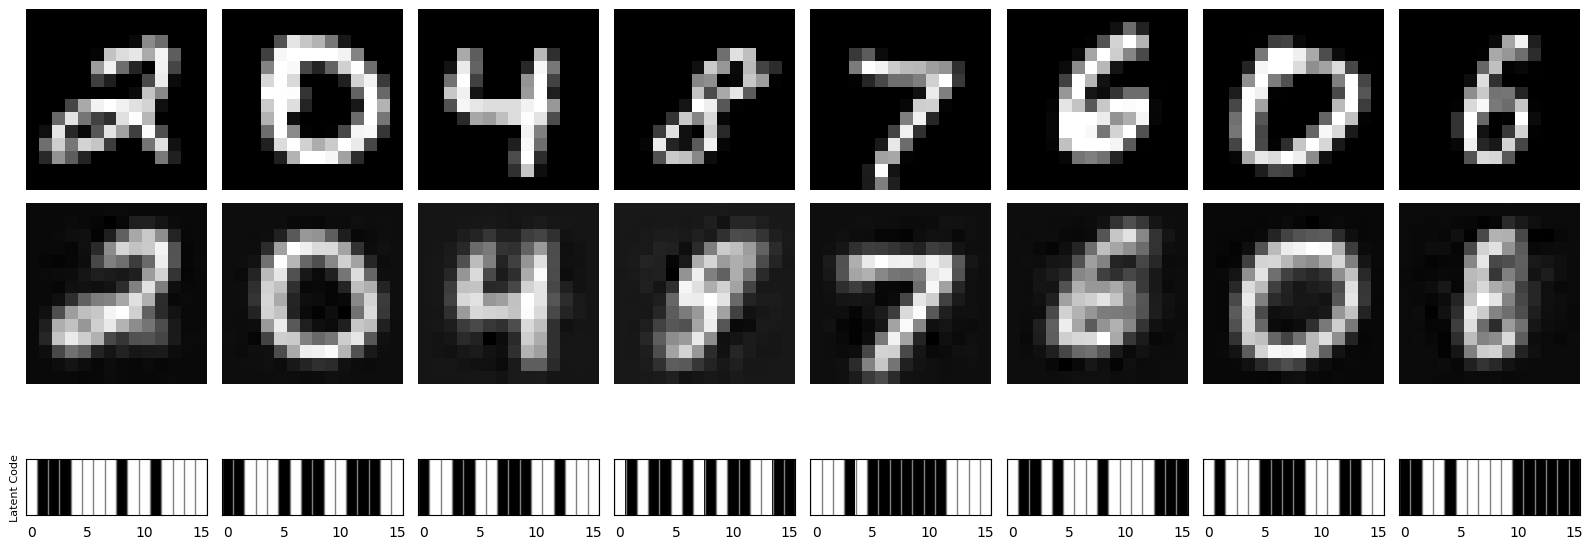

2025-04-11 10:24:32.064270: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [2]:
from jax import random
from datasets.mnist import MNISTDataset
from src.autoencoders.simple_vae import model
from src.autoencoders.deep_simple_vae import deeper_simple_vae as deep_model
from src.utils.autoencoder_trainer import AutoencoderTrainer

batch_size = 256
latent_dim = 16
rng = random.PRNGKey(0)
#binary_vae = model(latents=latent_dim)
deep_binary_vae = deep_model(latents=latent_dim)
input_shape = (batch_size, 196)
learning_rate = 3e-5

train_dataset = MNISTDataset(split='train', batch_size=batch_size, image_size=(14, 14)).load()
test_dataset = MNISTDataset(split='test', batch_size=batch_size, image_size=(14, 14)).load()

trainer = AutoencoderTrainer(deep_binary_vae, learning_rate, rng, input_shape)

trainer.train(train_dataset, batch_size=batch_size, num_epochs=250, run_dir="weights/deep_binary_vae_250epoch_3e-5lr_16latentdim")

trainer.plot_reconstructions(test_dataset, num_images=8)